In [30]:
from qiskit import QuantumCircuit,transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.visualization import plot_histogram

In [31]:
string='1110'
n=len(string)

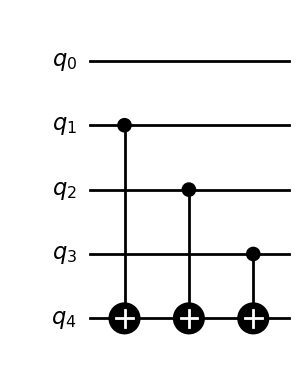

In [38]:
oracle=QuantumCircuit(n+1,name='Oracle')
for i,v in enumerate(string[::-1]):
    if v=='1':
        oracle.cx(i,n)
oracle.to_gate()
oracle.draw(output='mpl',style='bw')

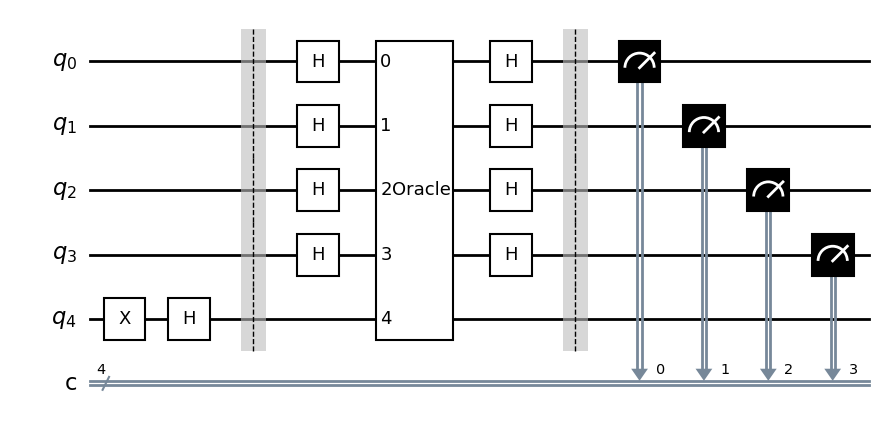

In [33]:
qc=QuantumCircuit(n+1,n)

#ancilia qubit
qc.x(n)
qc.h(n)
qc.barrier()
#hadmard transform
qc.h(range(n))
#apply oracle
qc.append(oracle,range(n+1))
#hadmard transform
qc.h(range(n))
qc.barrier()
#measure
qc.measure(range(n),range(n))

qc.draw(output='mpl',style='bw')

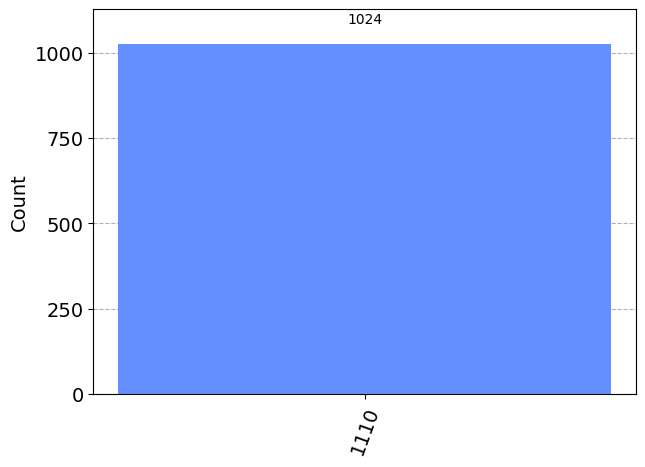

In [34]:
service=QiskitRuntimeService()
backend=service.get_backend('ibmq_qasm_simulator')
result=backend.run(transpile(qc,backend),shots=1024).result()
counts=result.get_counts(qc)
plot_histogram(counts)